In [1]:
import openai
import json

from execenvtool import ExecutionEnvironment

%reload_ext autoreload
%autoreload 2

In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [95]:
# Instanciar el entorno
env = ExecutionEnvironment()

# Definir las herramientas
functions = [
    {
        "name": "pyExec",
        "description": "Ejecuta código Python en un entorno persistente.",
        "parameters": {
            "type": "object",
            "properties": {
                "code": {"type": "string", "description": "El código Python a ejecutar."}
            },
            "required": ["code"]
        }
    },
    {
        "name": "format_variable",
        "description": "Formatea una variable del entorno para hacerla entendible por el LLM.",
        "parameters": {
            "type": "object",
            "properties": {
                "var_name": {"type": "string", "description": "Nombre de la variable a formatear."}
            },
            "required": ["var_name"]
        }
    }
]

client =openai.OpenAI()
messages = []

In [107]:

# Mensaje del usuario
messages = [
    {"role": "system", "content": "Eres un programador experto en Python. Respetas siempre PEP8. Tu objetivo es escribir el código necesario para realizar la tarea que te pidan."},
    {"role": "user", "content": "Crea una lista de los primeros 100 números y calcula su suma. "},
]

# # Generar respuesta del LLM con llamadas a funciones habilitadas
# response = openai.ChatCompletion.create(
#     model="gpt-4-0613",
#     messages=messages,
#     functions=functions,
#     function_call="auto"
# )

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)


In [108]:
response.choices[0].message

ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=FunctionCall(arguments='{"code":"numbers = list(range(1, 101))\\ntotal_sum = sum(numbers)"}', name='pyExec'), tool_calls=None)

In [ ]:
def process_response(response, messages):
    if response.choices[0].finish_reason == "function_call":
        function_call = response.choices[0].message.function_call
        function_name = function_call.name
        arguments = function_call.arguments

        function_call_result_message = {
            'role': 'tool',
        }

        if function_name == "pyExec":
            code = json.loads(arguments)['code']
            result = env.pyExec(code)

            function_call_result_message['content'] = json.dumps({
                'code': code,
                'variables in environment': result,})

            print(f"Código ejecutado:\n\n{code}\n")
            print("Resultado de pyExec:", result['lista_numeros'])
        elif function_name == "format_variable":
            var_name = arguments["var_name"]
            formatted = env.format_variable(var_name)

            function_call_result_message['content'] = json.dumps({
                'var_name': var_name,
                'formatted': formatted,})

            print("Variable formateada:", formatted)

        messages.append(response.choices[0].message)
        messages.append(function_call_result_message)
    elif response.choices[0].finish_reason == "tool_call":
        pass
    else:
        content = response.choices[0].message.content
        messages.append({"role": "assistant", "content": content})

Código ejecutado:

numbers = list(range(1, 101))
total_sum = sum(numbers)

Resultado de pyExec: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [112]:
response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)

[{'role': 'system',
  'content': 'Eres un programador experto en Python. Respetas siempre PEP8. Tu objetivo es escribir el código necesario para realizar la tarea que te pidan.'},
 {'role': 'user',
  'content': 'Crea una lista de los primeros 100 números y calcula su suma. '},
 ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=FunctionCall(arguments='{"code":"numbers = list(range(1, 101))\\ntotal_sum = sum(numbers)"}', name='pyExec'), tool_calls=None),
 {'role': 'tool',
  'content': '{"code": "numbers = list(range(1, 101))\\ntotal_sum = sum(numbers)", "variables in environment": {"lista_numeros": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 

In [102]:

# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = function_call.arguments

    if function_name == "pyExec":
        code = json.loads(arguments)['code']
        result = env.pyExec(code)
        print(f"Código ejecutado:\n\n{code}\n")
        print("Resultado de pyExec:", result['lista_numeros'])
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)


Código ejecutado:

# Crear una lista de los primeros 100 números
numeros = list(range(1, 101))

# Calcular la suma de los primeros 100 números
suma_numeros = sum(numeros)

Resultado de pyExec: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [52]:
# Mensaje del usuario
messages = [
    {"role": "user", "content": "Muestra la variable `lista_numeros` formateada."}	
]

# # Generar respuesta del LLM con llamadas a funciones habilitadas
# response = openai.ChatCompletion.create(
#     model="gpt-4-0613",
#     messages=messages,
#     functions=functions,
#     function_call="auto"
# )

client = openai.OpenAI()
response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)


In [55]:
# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = json.loads(function_call.arguments)

    if function_name == "pyExec":
        code = arguments['code']
        result = env.pyExec(code)
        print("Resultado de pyExec:", result)
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)


Variable formateada: {'type': 'list', 'size': 856, 'content': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]}


In [64]:
# Mensaje del usuario
messages = [
    {"role": "user", "content": "Genera un dataframe 10x5 con numeros aleatorios. Asígnalo a la variable `df_random`."},
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)


In [65]:
# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = json.loads(function_call.arguments)

    if function_name == "pyExec":
        code = arguments['code']
        result = env.pyExec(code)
        print("Resultado de pyExec:", result)
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)

Resultado de pyExec: {'numeros': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'suma_numeros': 5050, 'lista_numeros': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'suma_lista_numeros': 5050, 'pd': <module 'pandas' from 'c:\\Users\\migue\\Documents\\PROYECTOS DATA SCIENCE\\tst_agents\\.venv\\Lib\\site-p

In [66]:
# Mensaje del usuario
messages = [
    {"role": "user", "content": "Muestra el datafrasme `df_random` formateado"},
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)

In [67]:
response

ChatCompletion(id='chatcmpl-AgFqFmVpbsHl1jpbKe5EZQvOe4p8a', choices=[Choice(finish_reason='function_call', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=FunctionCall(arguments='{"var_name":"df_random"}', name='format_variable'), tool_calls=None))], created=1734634035, model='gpt-4o-2024-08-06', object='chat.completion', service_tier=None, system_fingerprint='fp_f785eb5f47', usage=CompletionUsage(completion_tokens=16, prompt_tokens=108, total_tokens=124, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [68]:
# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = json.loads(function_call.arguments)

    if function_name == "pyExec":
        code = arguments['code']
        result = env.pyExec(code)
        print("Resultado de pyExec:", result)
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)
else:
    print(response.choices[0].message.content)

Variable formateada: {'type': 'DataFrame', 'size': 564, 'content':       col_1     col_2     col_3     col_4     col_5
0  0.822162  0.328218  0.396446  0.068714  0.646396
1  0.103327  0.023288  0.388253  0.230713  0.624443
2  0.181536  0.167583  0.531788  0.867528  0.225602
3  0.716761  0.375365  0.599234  0.469871  0.857261
4  0.578073  0.207165  0.216533  0.000336  0.125650
5  0.788185  0.693517  0.231855  0.059930  0.603853
6  0.889193  0.644720  0.280851  0.185504  0.703642
7  0.293234  0.804929  0.585010  0.412482  0.036353
8  0.855304  0.710128  0.489700  0.024286  0.722990
9  0.219286  0.098513  0.758322  0.017946  0.690280}


In [69]:
# Mensaje del usuario
messages = [
    {"role": "user", "content": "Calcula estadisticos básicos para todas las columnas `df_random` y assignalas a otro dataframe `df_stats`."},
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)

In [88]:
# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = json.loads(function_call.arguments)

    if function_name == "pyExec":
        code = arguments['code']
        result = env.pyExec(code)['df_stats']
        print(f"Código ejecutado:\n\n{code}\n")
        print("Resultado de pyExec:\n\n", result)
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)
else:
    print(response.choices[0].message.content)

Código ejecutado:

import pandas as pd
import numpy as np

df_random = pd.DataFrame(np.random.rand(100, 5), columns=[f'col_{i}' for i in range(5)])

df_stats = df_random.describe().transpose()
df_stats

Resultado de pyExec:

        count      mean       std       min       25%       50%       75%  \
col_0  100.0  0.479439  0.284481  0.015156  0.265113  0.443111  0.725087   
col_1  100.0  0.494419  0.264964  0.013069  0.289194  0.500336  0.707419   
col_2  100.0  0.455909  0.274487  0.000422  0.235957  0.440049  0.698832   
col_3  100.0  0.515654  0.298999  0.003350  0.279013  0.518222  0.749496   
col_4  100.0  0.492392  0.278543  0.006042  0.260763  0.507278  0.713293   

            max  
col_0  0.998220  
col_1  0.993293  
col_2  0.974953  
col_3  0.994552  
col_4  0.996817  


In [84]:
result

,count,mean,std,min,25%,50%,75%,max
col_0,100.0,0.478815,0.300050,0.008745,0.204584,0.471068,0.726903,0.998708
col_1,100.0,0.562803,0.292008,0.000073,0.331212,0.585977,0.806177,0.995810
col_2,100.0,0.557433,0.278670,0.008298,0.308613,0.583332,0.778116,0.993446
col_3,100.0,0.491004,0.303655,0.001910,0.192489,0.501593,0.746168,0.999903
col_4,100.0,0.506791,0.262311,0.010605,0.319159,0.508901,0.724993,0.966139


In [80]:
function_name

'pyExec'

In [79]:
print(json.loads(response.choices[0].message.function_call.arguments)['code'])

import pandas as pd
import numpy as np

df_random = pd.DataFrame(np.random.rand(100, 5), columns=[f'col_{i}' for i in range(5)])

df_stats = df_random.describe().transpose()
df_stats


In [89]:
messages = [
    {"role": "user", "content": "Crea un scatter plot con las columnas 0 y 1 de `df_random`."},
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages,
    functions=functions,
    function_call="auto"
)

In [94]:
response.choices[0].message

ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=FunctionCall(arguments='{"code":"import pandas as pd\\nimport numpy as np\\nimport matplotlib.pyplot as plt\\n\\n# Crear un DataFrame aleatorio para df_random con 5 columnas y 100 filas\\ndf_random = pd.DataFrame(np.random.rand(100, 5), columns=[\'A\', \'B\', \'C\', \'D\', \'E\'])\\n\\n# Scatter plot para las columnas 0 (A) y 1 (B) de df_random\\nplt.figure(figsize=(8, 6))\\nplt.scatter(df_random.iloc[:, 0], df_random.iloc[:, 1], c=\'blue\', alpha=0.5)\\nplt.title(\'Scatter Plot de las columnas 0 y 1\')\\nplt.xlabel(\'Columna 0 (A)\')\\nplt.ylabel(\'Columna 1 (B)\')\\nplt.grid(True)\\nplt.show()"}', name='pyExec'), tool_calls=None)

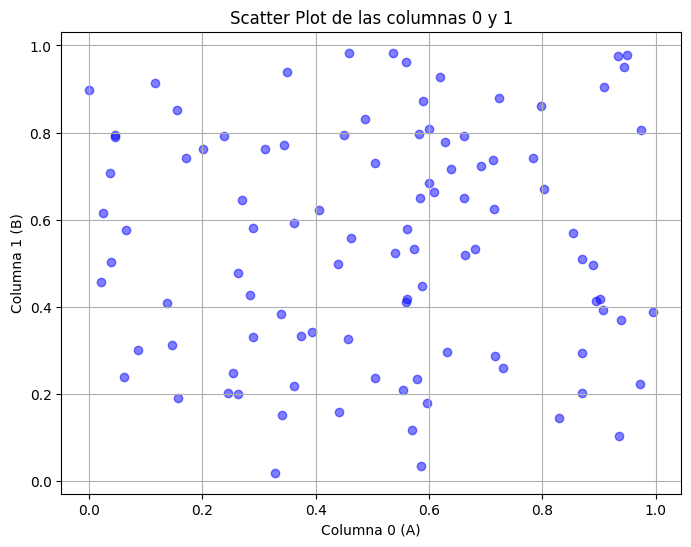

Código ejecutado:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame aleatorio para df_random con 5 columnas y 100 filas
df_random = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Scatter plot para las columnas 0 (A) y 1 (B) de df_random
plt.figure(figsize=(8, 6))
plt.scatter(df_random.iloc[:, 0], df_random.iloc[:, 1], c='blue', alpha=0.5)
plt.title('Scatter Plot de las columnas 0 y 1')
plt.xlabel('Columna 0 (A)')
plt.ylabel('Columna 1 (B)')
plt.grid(True)
plt.show()

Resultado de pyExec:

 {'numeros': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'suma_numeros': 5050, 'list

In [92]:
# Procesar la llamada a funciones
if response.choices[0].finish_reason == "function_call":
    function_call = response.choices[0].message.function_call
    function_name = function_call.name
    arguments = json.loads(function_call.arguments)

    if function_name == "pyExec":
        code = arguments['code']
        result = env.pyExec(code)
        print(f"Código ejecutado:\n\n{code}\n")
        print("Resultado de pyExec:\n\n", result)
    elif function_name == "format_variable":
        var_name = arguments["var_name"]
        formatted = env.format_variable(var_name)
        print("Variable formateada:", formatted)
else:
    print(response.choices[0].message.content)